In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importación de librerias
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 

In [3]:
#Carga datos 
ruta_archivo1 = 'car_data.csv'
ruta_archivo2 = 'car_details_from_car_dekho.csv'
ruta_archivo3 = 'car_detailsv3.csv'
ruta_archivo4 = 'car_detailsv4.csv'
df1 = pd.read_csv(ruta_archivo1)
df2 = pd.read_csv(ruta_archivo2)
df3 = pd.read_csv(ruta_archivo3)
df4 = pd.read_csv(ruta_archivo4)

#Revisión de los datos
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#Lectura tipo de campo
df1.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [5]:
#Revisión de datos nulos
df1.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
#Revisión de datos atípicos
dueno = df1.Owner.value_counts().sort_values(ascending=False)
dueno

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [7]:
#Corrección de datos atipicos a fomra interpretable:
df1["Owner"] = df1["Owner"].replace(0, 'First Owner')
df1["Owner"] = df1["Owner"].replace(1, 'Second Owner')
df1["Owner"] = df1["Owner"].replace(3, 'Third Owner')

In [8]:
dueno = df1.Owner.value_counts().sort_values(ascending=False)
dueno

Owner
First Owner     290
Second Owner     10
Third Owner       1
Name: count, dtype: int64

In [9]:
# Variables independientes (Tamaño y Habitaciones) y dependiente (Precio)
X = df1[['Year']]
y = df1['Selling_Price']

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

LinearRegression()

Intercepto (β0): -831.1789245913276
Coeficiente (Selling_Price, β1): [0.41509169]


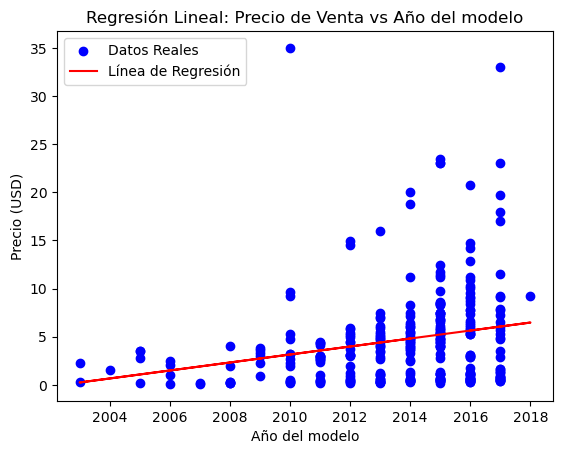

In [10]:
# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1 = modelo.coef_  # Pendientes (Tamaño y Habitaciones)

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Selling_Price, β1): {beta_1}")

# Visualizar la regresión (opcional para datos simples)
plt.scatter(df1['Year'], y, color='blue', label='Datos Reales')
plt.plot(df1['Year'], modelo.predict(X), color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Precio de Venta vs Año del modelo')
plt.xlabel('Año del modelo')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()

In [11]:
# Predecir precios para dos nuevos valores
nuevo_X = np.array([[2010], [2004]])  # Nuevos valores (Años del modelo)
predicciones = modelo.predict(nuevo_X) * 10000

# Mostrar las predicciones
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Año: {nuevo_X[i][0]}): {pred:.2f} USD")


Predicciones:
Predicción 1 para (Año: 2010): 31553.82 USD
Predicción 2 para (Año: 2004): 6648.31 USD


C:\Users\Bryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
#Revisión de los datos 2
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Intercepto (β0): -1223.8470814194086
Coeficiente (Año, β1): 0.6095909188678942
Coeficiente (Km, β2): 2.7582357080900375e-05


C:\Users\Bryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


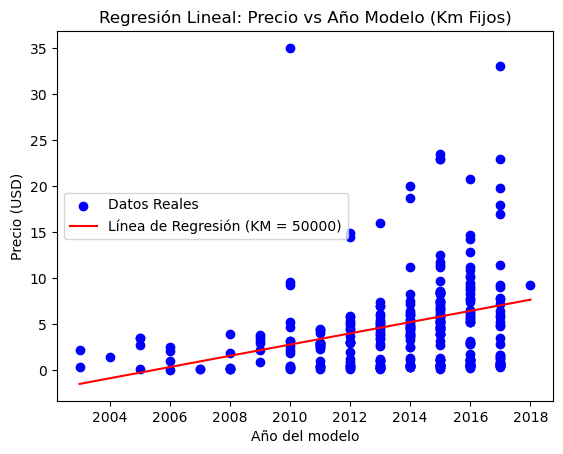

In [31]:
# Variables independientes (Año y Kilometraje) y dependiente (Precio)
X = df1[['Year', 'Kms_Driven']]
y = df1['Selling_Price']

# Crear un modelo de regresión lineal
modelo2 = LinearRegression()

# Ajustar el modelo a los datos
modelo2.fit(X, y)

# Coeficientes de la regresión
beta_0 = modelo2.intercept_  # Intercepto
beta_1, beta_2 = modelo2.coef_  # Pendientes (Año y Kilometraje)

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Año, β1): {beta_1}")
print(f"Coeficiente (Km, β2): {beta_2}")

# Visualización de la regresión (manteniendo constante el número de Km)
km_fijos = 50000  # No. KM fijos
año_range = np.linspace(df1['Year'].min(), df1['Year'].max(), 100)

# Predecir manteniendo las habitaciones constantes
predicciones_fijas = modelo2.predict(np.column_stack((año_range, np.full_like(año_range, km_fijos))))

# Graficar los datos reales y la línea de regresión
plt.scatter(df1['Year'], y, color='blue', label='Datos Reales')
plt.plot(año_range, predicciones_fijas, color='red', label=f'Línea de Regresión (KM = {km_fijos})')
plt.title('Regresión Lineal: Precio vs Año Modelo (Km Fijos)')
plt.xlabel('Año del modelo')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()

In [39]:
# Predecir precios para dos nuevos valores
nuevo_X = np.array([[2010, 11000], [2004, 5000]])  # Nuevos valores (Tamaño, Habitaciones)
predicciones = modelo2.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Modelo: {nuevo_X[i][0]}, Km recorridos: {nuevo_X[i][1]}): {pred:.2f} USD")


Predicciones:
Predicción 1 para (Modelo: 2010, Km recorridos: 11000): 1.73 USD
Predicción 2 para (Modelo: 2004, Km recorridos: 5000): -2.09 USD


C:\Users\Bryan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
# Importar librerías necesarias
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Datos (suponiendo que tienes el dataset con 30 ejemplos de tamaño, habitaciones y precio)
# Por ejemplo, los datos se pueden construir como arrays o un DataFrame

X = df1[['Year', 'Kms_Driven']]
y = df1['Selling_Price']

# Definir el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos
model.fit(X, y)

# Realizar predicciones en los datos de entrenamiento
predicciones = model.predict(X)

# Calcular las métricas de evaluación
r2 = r2_score(y, predicciones)  # Coeficiente de determinación R²
mae = mean_absolute_error(y, predicciones)  # Error Absoluto Medio
mse = mean_squared_error(y, predicciones)   # Error Cuadrático Medio
rmse = np.sqrt(mse)                         # Raíz del Error Cuadrático Medio

# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

R² (Coeficiente de determinación): 0.08805034494020303
Error Absoluto Medio (MAE): 3.085586833810337
